In [ ]:
# default_exp datasets
from nbdev.showdoc import *
import numpy as np
%load_ext autoreload
%autoreload 2

## Branch

In [ ]:
# export
def directed_one_variable_function(func, deriv, xlow, xhigh, num_nodes=100, sigma=0.25):
  # positions
  x = np.random.uniform(xlow, xhigh, num_nodes)
  x = np.sort(x)
  labels = x
  y = func(x)
  z = np.zeros(num_nodes)
  # vectors
  u = np.ones(num_nodes)
  v = deriv(x)
  w = np.zeros(num_nodes)
  flow = np.column_stack((u, v, w))
  # noise
  x += np.random.normal(0, sigma, num_nodes)
  y += np.random.normal(0, sigma, num_nodes)
  z += np.random.normal(0, sigma, num_nodes)
  X = np.column_stack((x, y, z))
  return X, flow, labels

In [ ]:
# export
from directed_graphs.datasets import xy_tilt
def directed_sinh_branch(num_nodes=1000, xscale=1, yscale=1, sigma=0.25, xtilt=0, ytilt=0):
  num_nodes_per_branch = num_nodes//3
  # root
  X_root, flow_root, labels_root = directed_one_variable_function(
    lambda x: np.sinh(x / xscale) * yscale, 
    lambda x: np.cosh(x / xscale) / xscale * yscale, 
    xlow=-xscale*np.pi*0.84, 
    xhigh=0, 
    num_nodes=num_nodes - 2*num_nodes_per_branch, 
    sigma=sigma
  )
  # branch 1
  X_branch1, flow_branch1, labels_branch1 = directed_one_variable_function(
    lambda x: np.sinh(x / xscale) * yscale, 
    lambda x: np.cosh(x / xscale) / xscale * yscale, 
    xlow=0, 
    xhigh=xscale*np.pi*0.84, 
    num_nodes=num_nodes_per_branch, 
    sigma=sigma
  )
  # branch 2
  X_branch2, flow_branch2, labels_branch2 = directed_one_variable_function(
    lambda x: np.sin(x / xscale) * yscale, 
    lambda x: np.cos(x / xscale) / xscale * yscale, 
    xlow=0, 
    xhigh=xscale*np.pi*2, 
    num_nodes=num_nodes_per_branch, 
    sigma=sigma
  )
  # concatenate
  X = np.concatenate((X_root, X_branch1, X_branch2))
  flow = np.concatenate((flow_root, flow_branch1, flow_branch2))
  labels = np.concatenate((labels_root - np.pi*3, labels_branch1, labels_branch2 + np.pi*3))
  # tilt 
  X, flow, labels = xy_tilt(X, flow, labels, xtilt=xtilt, ytilt=ytilt)
  return X, flow, labels


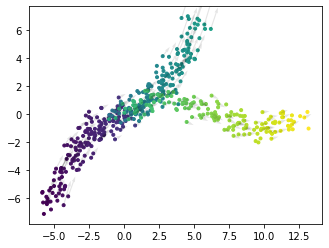

In [ ]:
from directed_graphs.datasets import plot_directed_2d
X, flow, labels = directed_sinh_branch(num_nodes=500, xscale=2, yscale=1, sigma=0.5)
plot_directed_2d(X, flow, labels)

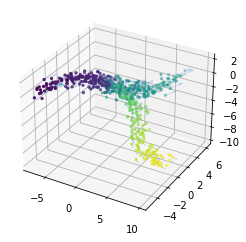

In [ ]:
from directed_graphs.datasets import plot_directed_3d
X, flow, labels = directed_sinh_branch(num_nodes=500, xscale=2, yscale=1, sigma=0.5, xtilt=np.pi/4, ytilt=np.pi/4)
plot_directed_3d(X, flow, labels)

## Clusters

In [ ]:
# export
def static_clusters(num_nodes=250, num_clusters=5, radius=1, sigma=0.2, xtilt=0, ytilt=0):
  thetas = np.repeat([2*np.pi*i/num_clusters for i in range(num_clusters)], num_nodes//num_clusters)
  x = np.cos(thetas) * radius + np.random.normal(loc=0, scale=sigma, size=num_nodes)
  y = np.sin(thetas) * radius + np.random.normal(loc=0, scale=sigma, size=num_nodes)
  z = np.zeros(num_nodes)
  X = np.column_stack((x, y, z))
  flow = np.zeros(X.shape)
  X, flow, lables = xy_tilt(X, flow, thetas, xtilt=xtilt, ytilt=ytilt)
  return X, flow, lables

c:\Users\nhiin\Downloads\Anaconda\envs\sumry-directed-graphs\lib\site-packages\matplotlib\quiver.py:689: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
c:\Users\nhiin\Downloads\Anaconda\envs\sumry-directed-graphs\lib\site-packages\matplotlib\quiver.py:689: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


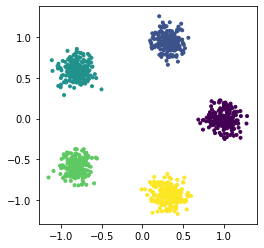

In [ ]:
from directed_graphs.datasets import plot_directed_2d
X, flow, lables = static_clusters(num_nodes=1000, num_clusters=5, radius=1, sigma=0.1)
plot_directed_2d(X, flow, lables)

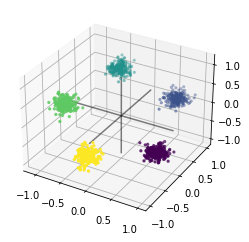

In [ ]:
from directed_graphs.datasets import plot_directed_2d
X, flow, lables = static_clusters(num_nodes=1000, num_clusters=5, radius=1, sigma=0.1, xtilt=np.pi/4, ytilt=np.pi/4)
plot_directed_3d(X, flow, lables)